### Name: Neel Narvekar 
### Roll No.: 49
### PID: 246041
### Date: 9/02/2026
### Subject: ML
## Expt.-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

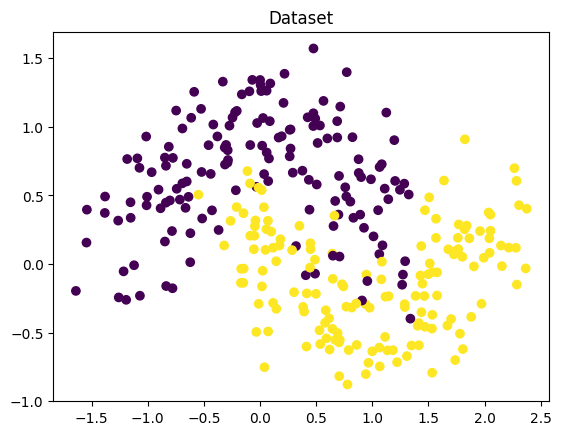

In [36]:
x,y= make_moons(n_samples=300, noise=0.25 ,random_state=195)
plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Dataset")
plt.show()


In [37]:
x_train, x_test,y_train, y_test =train_test_split(
    x,y, test_size=0.3, random_state=0
)

In [38]:
scaler= StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [39]:
lr=LogisticRegression()
lr.fit(x_train_scaled, y_train)
y_pred_lr =lr.predict(x_test_scaled)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy: 0.8222222222222222
confusion matrix:
 [[39 11]
 [ 5 35]]


In [40]:
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt =dt.predict(x_test)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test,y_pred_dt))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_dt))

Logistic Regression
Accuracy: 0.9444444444444444
confusion matrix:
 [[45  5]
 [ 0 40]]


In [41]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)

print("knn")
print("Accuracy:",accuracy_score(y_test,y_pred_knn))
print("confusion matrix:\n",confusion_matrix(y_test, y_pred_knn))

knn
Accuracy: 0.9222222222222223
confusion matrix:
 [[43  7]
 [ 0 40]]


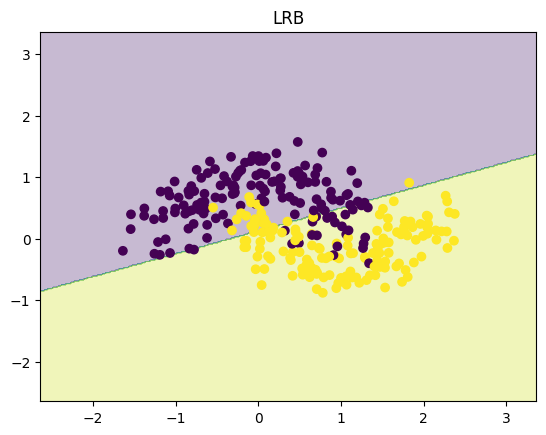

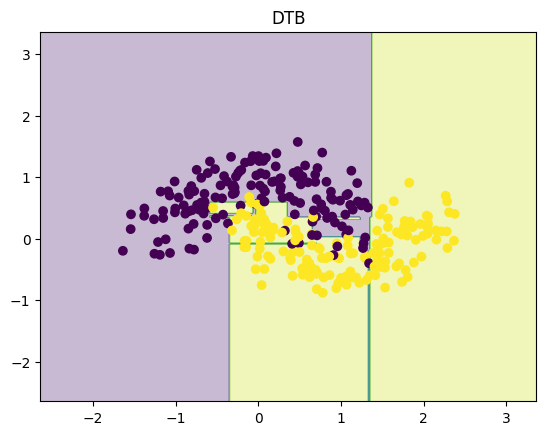

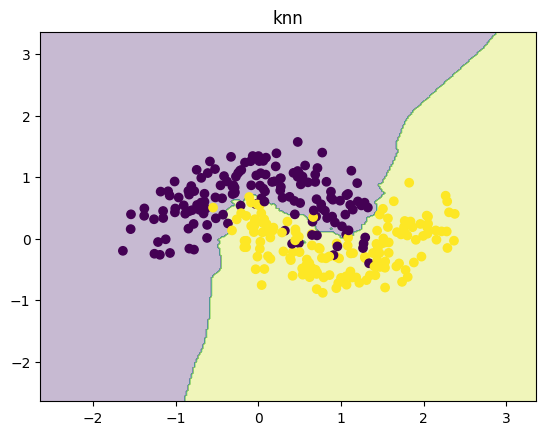

In [47]:
def plot_boundary(model,scaled,title):
    h=0.02
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,0].min()-1,x[:,0].max()+1

    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
    np.arange(y_min,y_max,h))

    grid=np.c_[xx.ravel(),yy.ravel()]
    if scaled:
        grid=scaler.transform(grid)
    z=model.predict(grid)
    z=z.reshape(xx.shape)

    plt.contourf(xx,yy,z, alpha=0.3)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.title(title)
    plt.show()
plot_boundary(lr,True,"LRB")
plot_boundary(dt,False,"DTB")
plot_boundary(knn,False,"knn")